In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os



In [1]:
import os
cwd = os.getcwd()
cwd

'/Users/sankalp/Documents/URL Code'

In [29]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import re
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [5]:
data = pd.read_csv(cwd +'/malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [34]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [35]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

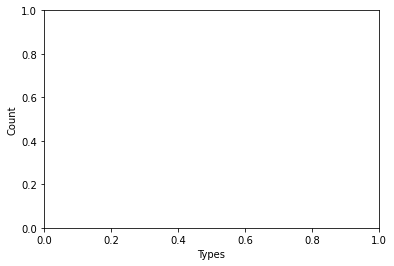

In [36]:
#sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [37]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [38]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":1, "malware":1}}
data['Category'] = data['type']
data = data.replace(rem)
data

,url,type,Category
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [39]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [40]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))
data

,url,type,Category,domain
0,br-icloud.com.br,phishing,1,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org


In [41]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [42]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))
data


,url,type,Category,domain,sus_url
0,br-icloud.com.br,phishing,1,br-icloud.com.br,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org,0


In [43]:

from urllib.parse import parse_qsl, urljoin, urlparse


data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
data

,url,type,Category,domain,sus_url,abnormal_url
0,br-icloud.com.br,phishing,1,br-icloud.com.br,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org,0,0


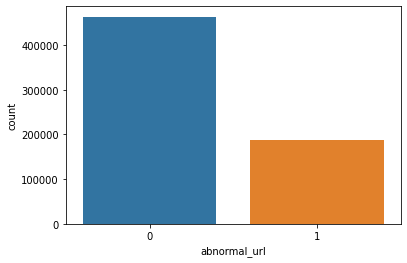

In [44]:
sns.countplot(x='abnormal_url', data=data);

In [45]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [46]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))
data

,url,type,Category,domain,sus_url,abnormal_url,https
0,br-icloud.com.br,phishing,1,br-icloud.com.br,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,0
...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org,0,0,0


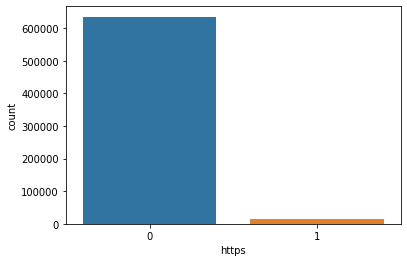

In [47]:
sns.countplot(x='https', data=data);

In [48]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [49]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data

,url,type,Category,domain,sus_url,abnormal_url,https,having_ip_address
0,br-icloud.com.br,phishing,1,br-icloud.com.br,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,0,0
...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org,0,0,0,0


In [50]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

In [51]:
data

,url,type,Category,domain,sus_url,abnormal_url,https,having_ip_address
0,br-icloud.com.br,phishing,1,br-icloud.com.br,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,0,0
...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,xbox360.ign.com,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,games.teamxbox.com,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1,www.gamespot.com,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,en.wikipedia.org,0,0,0,0


In [52]:
counts = data.domain.value_counts()
counts.nlargest(10)

from sklearn.preprocessing import OneHotEncoder
#df =pd.get_dummies(data['domain'],drop_first=True)
df = pd.get_dummies(data.loc[data['domain'].isin(counts.nlargest(100).index)], columns=['domain']) 
df = df.drop(['Category'],axis=1)#,'type_code'

df

,url,type,sus_url,abnormal_url,https,having_ip_address,domain_'9d345009-a-62cb3a1a-s-sites.googlegroups.com,domain_123people.ca,domain_123people.com,domain_192.com,...,domain_videosurf.com,domain_whosdatedwho.com,domain_wiki.answers.com,domain_wn.com,domain_worthpoint.com,domain_www.angelfire.com,domain_yelp.com,domain_youtube.com,domain_zimbio.com,domain_zoominfo.com
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,corporationwiki.com/Ohio/Columbus/frank-s-bens...,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,myspace.com/video/vid/30602581,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,uk.linkedin.com/pub/steve-rubenstein/8/718/755,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,baseball-reference.com/players/h/harrige01.shtml,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650807,en.wikipedia.org/wiki/Lost:_The_Video_Game,phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650896,en.wikipedia.org/wiki/No_More_Heroes_(video_game),phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651157,en.wikipedia.org/wiki/Call_of_Cthulhu:_Dark_Co...,phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df

,url,type,sus_url,abnormal_url,https,having_ip_address,domain_'9d345009-a-62cb3a1a-s-sites.googlegroups.com,domain_123people.ca,domain_123people.com,domain_192.com,...,domain_videosurf.com,domain_whosdatedwho.com,domain_wiki.answers.com,domain_wn.com,domain_worthpoint.com,domain_www.angelfire.com,domain_yelp.com,domain_youtube.com,domain_zimbio.com,domain_zoominfo.com
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,corporationwiki.com/Ohio/Columbus/frank-s-bens...,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,myspace.com/video/vid/30602581,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,uk.linkedin.com/pub/steve-rubenstein/8/718/755,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,baseball-reference.com/players/h/harrige01.shtml,benign,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650807,en.wikipedia.org/wiki/Lost:_The_Video_Game,phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650896,en.wikipedia.org/wiki/No_More_Heroes_(video_game),phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651157,en.wikipedia.org/wiki/Call_of_Cthulhu:_Dark_Co...,phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_train = pd.concat([data , df], axis =1)
data_train = data_train.fillna(0)
data_train.info()
data_train['Category']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651191 entries, 0 to 651190
Columns: 114 entries, url to domain_zoominfo.com
dtypes: float64(104), int64(5), object(5)
memory usage: 571.3+ MB


0         1
1         0
2         0
3         1
4         1
         ..
651186    1
651187    1
651188    1
651189    1
651190    1
Name: Category, Length: 651191, dtype: int64

In [55]:
data_train.isnull().sum()

url                         0
type                        0
Category                    0
domain                      0
sus_url                     0
                           ..
domain_www.angelfire.com    0
domain_yelp.com             0
domain_youtube.com          0
domain_zimbio.com           0
domain_zoominfo.com         0
Length: 114, dtype: int64

In [56]:
data_train.columns

Index(['url', 'type', 'Category', 'domain', 'sus_url', 'abnormal_url', 'https',
       'having_ip_address', 'url', 'type',
       ...
       'domain_videosurf.com', 'domain_whosdatedwho.com',
       'domain_wiki.answers.com', 'domain_wn.com', 'domain_worthpoint.com',
       'domain_www.angelfire.com', 'domain_yelp.com', 'domain_youtube.com',
       'domain_zimbio.com', 'domain_zoominfo.com'],
      dtype='object', length=114)

In [57]:
X = data_train.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data_train['Category']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)

In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [60]:
y_train

416082    0
81244     1
589451    0
344988    1
439638    0
         ..
84434     0
437782    0
620104    1
203245    0
100879    1
Name: Category, Length: 130238, dtype: int64

In [61]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [ ]:
X_train

array([[-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 ,  1.57231677, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [ 3.75733757, -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       ...,
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 ,  1.57231677, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842]])

In [ ]:
X_test

array([[-0.2661459 ,  1.57231677, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 ,  1.57231677, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       ...,
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842],
       [-0.2661459 , -0.63600416, -0.15883849, ..., -0.11697463,
        -0.0277203 , -0.02972842]])

In [ ]:
valpred  = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Logistic Regression: ")
acc
#>>> accuracy_score(y_true, y_pred, normalize=False)

Accuracy for Logistic Regression: 


0.8656462291223969

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Logistic Regression")
avg

AUPRC for Logistic Regression


0.7206112223388925

In [ ]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
549880    1
457491    1
148149    0
574773    0
369760    0
Name: Category, Length: 520953, dtype: int64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
valpred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Decision Tree: ")
acc

Accuracy for Decision Tree: 


0.867195313204838

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Decision Tree:")
avg

AUPRC for Decision Tree:


0.723845506207181

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for Naive Bayes:")
acc


Accuracy for Naive Bayes:


0.4847039944102443

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Naive Bayes")
avg

AUPRC for Naive Bayes


0.723845506207181

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for K nearest Neighbours :")
acc


Accuracy for K nearest Neighbours :


0.8670858983439965

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, y_pred.round())
print("AUPRC for K nearest Neighbours")
avg

AUPRC for K nearest Neighbours


0.7235553685591986

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
valpred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
acc

0.8671703589383303

In [ ]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for SVC")
avg

AUPRC for Logistic Regression


0.7237986902467965

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
valpred = rf_random.predict(X_test)
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Logistic Regression")
avg